# Positive correlation(0 to +1)

In [2]:
import numpy as np

np.random.seed(1)
x = np.random.randint(0,50,1000)
y = x+np.random.normal(0,10,1000)

In [3]:
np.corrcoef(x,y)

array([[1.        , 0.81543901],
       [0.81543901, 1.        ]])

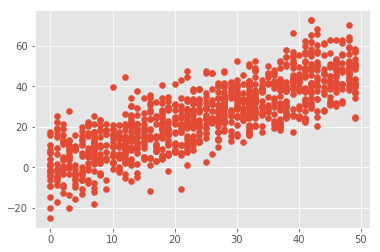

In [10]:
import matplotlib.pyplot as plt
plt.matplotlib.style.use('ggplot')
plt.scatter(x, y)
plt.show()

# Negative correlation

In [20]:
np.random.seed(1)
x = np.random.randint(0,50,1000)
y = 100-x+np.random.normal(0,5,1000)

In [21]:
np.corrcoef(x,y)

array([[ 1.        , -0.94363236],
       [-0.94363236,  1.        ]])

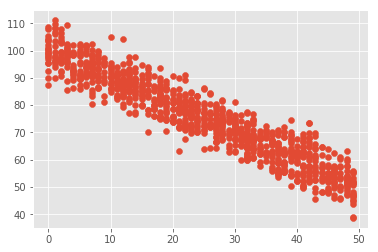

In [22]:
plt.scatter(x,y)
plt.show()

In [23]:
import os

os.chdir("E:/D-drive/DS/data/01 DS ML DL NLP and AI With Python Lab Copy/02.LabData")

In [24]:
os.getcwd()

'E:\\D-drive\\DS\\data\\01 DS ML DL NLP and AI With Python Lab Copy\\02.LabData'

In [25]:
import pandas as pd

df = pd.read_csv("auto-mpg.csv")
df.head()

,mpg,displ,hp,weight,accel,size
0,18.0,250.0,88,3139,14.5,15.0
1,9.0,304.0,193,4732,18.5,20.0
2,36.1,91.0,60,1800,16.4,10.0
3,18.5,250.0,98,3525,19.0,15.0
4,34.3,97.0,78,2188,15.8,10.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 6 columns):
mpg       392 non-null float64
displ     392 non-null float64
hp        392 non-null int64
weight    392 non-null int64
accel     392 non-null float64
size      392 non-null float64
dtypes: float64(4), int64(2)
memory usage: 18.5 KB


In [9]:
np.corrcoef(df['weight'],df['mpg'])

array([[ 1.        , -0.83224421],
       [-0.83224421,  1.        ]])

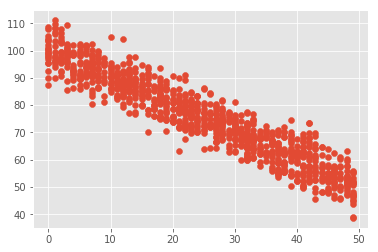

In [28]:
plt.scatter(x,y)
plt.show()

# No Correlation

In [30]:
np.random.seed(1)
x = np.random.randint(0,50,1000)
y = np.random.randint(0,50,1000)

In [31]:
np.corrcoef(x,y)

array([[1.        , 0.00404702],
       [0.00404702, 1.        ]])

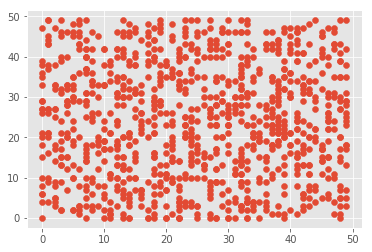

In [32]:
plt.scatter(x,y)
plt.show()

# Correlation matrix

In [33]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'a': np.random.randint(0, 50, 1000)})
df['b'] = df['a'] + np.random.normal(0, 10, 1000) # positively correlated with 'a'
df['c'] = 100 - df['a'] + np.random.normal(0, 5, 1000) # negatively correlated with 'a'
df['d'] = np.random.randint(0, 50, 1000) # not correlated with 'a'

In [34]:
df.head()

,a,b,c,d
0,37,40.965519,66.264598,9
1,16,23.190647,73.664131,43
2,25,44.678859,80.525157,0
3,43,39.800824,59.968067,9
4,46,51.453126,55.020292,1


In [35]:
df.corr()

,a,b,c,d
a,1.000000,0.821847,-0.944769,0.044873
b,0.821847,1.000000,-0.773454,0.015559
c,-0.944769,-0.773454,1.000000,-0.043849
d,0.044873,0.015559,-0.043849,1.000000


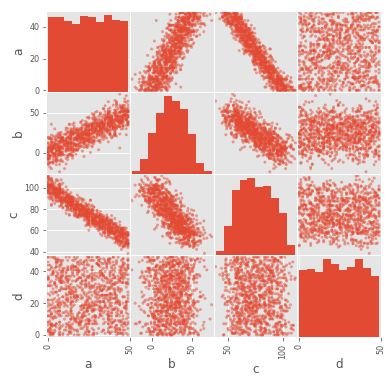

In [36]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(6,6))
plt.show()

# correlation matrix plot

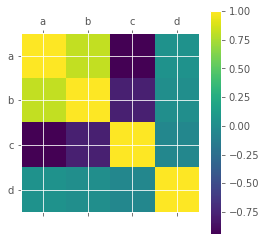

In [37]:
# heat map
plt.matshow(df.corr())
plt.xticks(range(len(df.columns)), df.columns)
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()
plt.show()

# Auto Correlation

In [42]:
import os
os.chdir("E:/D-drive/DS/data/01 DS ML DL NLP and AI With Python Lab Copy/02.LabData")

In [48]:
import pandas as pd
df = pd.read_csv("MSFT.csv", index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1258 entries, 8/6/2012 to 8/4/2017
Data columns (total 1 columns):
Adj Close    1258 non-null float64
dtypes: float64(1)
memory usage: 19.7+ KB


In [49]:
df.index = pd.to_datetime(df.index)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-08-06 to 2017-08-04
Data columns (total 1 columns):
Adj Close    1258 non-null float64
dtypes: float64(1)
memory usage: 19.7 KB


In [51]:
# Convert the daily data to weekly data
df = df.resample(rule='W', how='last')
df.head()

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  


,Adj Close
Date,
2012-08-12,26.517351
2012-08-19,27.114212
2012-08-26,26.815865
2012-09-02,27.044012
2012-09-09,27.158091


In [53]:
# Compute the percentage change of prices
returns = df.pct_change()
returns.head()

,Adj Close
Date,
2012-08-12,NaN
2012-08-19,0.022508
2012-08-26,-0.011003
2012-09-02,0.008508
2012-09-09,0.004218


In [54]:
# Compute and print the autocorrelation of returns
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly returns is %4.2f" %(autocorrelation))

The autocorrelation of weekly returns is -0.16
